# Data preprocessing: PCA

**NOTEBOOK GOAL**: Aggregate attributes into meaningful Principal Components

**DATASET TRANSFORMATION**: `preprocessed_(train|test).csv` >> `preprocessed_(train|test)_PCA.csv`


In [ ]:
# reoder variables to work on train or test dataset
work_on = 'test'
work_on = 'train'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})  

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv('./dataset/preprocessed_' + work_on + '.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433958 entries, 0 to 433957
Data columns (total 57 columns):
StoreID                        433958 non-null int64
Date                           433958 non-null object
IsHoliday                      433958 non-null int64
HasPromotions                  433958 non-null int64
StoreType                      433958 non-null object
AssortmentType                 433958 non-null object
NearestCompetitor              433958 non-null int64
Region                         433958 non-null int64
NumberOfCustomers              433958 non-null int64
NumberOfSales                  433958 non-null int64
Region_AreaKM2                 433958 non-null int64
Region_GDP                     433958 non-null int64
Region_PopulationK             433958 non-null int64
CloudCover                     433958 non-null float64
Events                         433958 non-null object
Max_Dew_PointC                 433958 non-null int64
Max_Humidity                   4339

In [5]:
m = df.isnull().any()
print("========= COLUMNS WITH NULL VALUES =================")
print(m[m])
print("========= COLUMNS WITH INFINITE VALUES =================")
m = np.isfinite(df.select_dtypes(include=['float64'])).any()
print(m[m])

========= COLUMNS WITH NULL VALUES =================
Series([], dtype: bool)
========= COLUMNS WITH INFINITE VALUES =================
CloudCover             True
Max_VisibilityKm       True
Mean_VisibilityKm      True
Min_VisibilitykM       True
Precipitationmm        True
MeanStoreSales         True
MeanRegionSales        True
MeanCustomers          True
MeanRegionCustomers    True
D_DayOfWeek_cos        True
D_DayOfWeek_sin        True
dtype: bool


Normalization

In [6]:
df = df.reset_index()

In [7]:
import sklearn.preprocessing
features = ['Max_Dew_PointC','Max_Humidity','Max_Sea_Level_PressurehPa','Max_TemperatureC',
            'Max_Wind_SpeedKm_h','Mean_Dew_PointC','Mean_Humidity','Mean_Sea_Level_PressurehPa',
            'Mean_TemperatureC','Mean_Wind_SpeedKm_h','Min_Dew_PointC','Min_Humidity',
            'Min_Sea_Level_PressurehPa','Min_TemperatureC','Precipitationmm','Mean_VisibilityKm',
            'Events_Fog','Events_Hail','Events_Thunderstorm','Events_Rain','Events_Snow','Max_VisibilityKm',
            'Min_VisibilitykM']
# Separating out the features
x = df.loc[:, features].values
x
# Separating out the target
#y = df.loc[:,['NumberOfSales']].values
# Standardizing the features
x = sklearn.preprocessing.normalize(x,axis=0)
dff=pd.DataFrame(x)
dff

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.000145,0.001618,0.001539,0.000182,0.001338,-0.000177,0.001639,0.001540,0.000121,0.001863,...,0.000171,0.000000,0.000000e+00,0.00000,0.000000,0.0,0.001972,0.005478,0.000000e+00,0.000000e+00
1,0.000000,0.001407,0.001536,0.000455,0.001019,-0.000177,0.001459,0.001536,0.000364,0.001165,...,0.000171,0.000000,5.028127e-09,0.00000,0.000000,0.0,0.000000,0.005478,5.028127e-09,5.028127e-09
2,0.000000,0.001310,0.001530,0.000364,0.001465,-0.000177,0.001419,0.001531,0.000364,0.001165,...,0.000342,0.000000,1.005625e-08,0.00000,0.000000,0.0,0.001972,0.000000,1.005625e-08,1.005625e-08
3,-0.000436,0.001294,0.001531,0.000728,0.001211,-0.000706,0.001119,0.001531,0.000364,0.001165,...,-0.000171,0.000000,1.508438e-08,0.00000,0.000000,0.0,0.000000,0.000000,1.508438e-08,1.508438e-08
4,-0.000290,0.001504,0.001527,0.001001,0.001529,-0.000530,0.001299,0.001525,0.000485,0.001281,...,-0.000342,0.000000,2.514063e-08,0.00000,0.000000,0.0,0.000000,0.000000,2.514063e-08,2.514063e-08
5,-0.000145,0.001407,0.001516,0.001183,0.000892,-0.000353,0.001199,0.001514,0.000728,0.000932,...,-0.000342,0.000000,3.016876e-08,0.00000,0.000000,0.0,0.000000,0.000000,3.016876e-08,3.016876e-08
6,0.000290,0.001504,0.001504,0.001365,0.001019,-0.000177,0.001179,0.001502,0.000849,0.001165,...,-0.000171,0.000000,3.519689e-08,0.00000,0.000000,0.0,0.000000,0.000000,3.519689e-08,3.519689e-08
7,0.001162,0.001407,0.001494,0.001456,0.000828,0.000353,0.001099,0.001496,0.001335,0.000699,...,0.001026,0.000000,4.022501e-08,0.00000,0.000000,0.0,0.001972,0.000000,4.022501e-08,4.022501e-08
8,0.001162,0.001504,0.001494,0.001547,0.000892,0.001236,0.001419,0.001496,0.001456,0.001281,...,0.001197,0.000280,4.525314e-08,0.00000,0.000000,0.0,0.001972,0.000000,4.525314e-08,4.525314e-08
9,0.001452,0.001618,0.001494,0.001183,0.001657,0.001236,0.001599,0.001497,0.001213,0.001281,...,0.001026,0.000000,5.028127e-08,0.00000,0.000000,0.0,0.001972,0.000000,5.028127e-08,5.028127e-08


In [8]:
# remaining features after PCA
remaining_features = list(df.columns)

for f in features:
    print(f)
    remaining_features.remove(f)

remaining_features

Max_Dew_PointC
Max_Humidity
Max_Sea_Level_PressurehPa
Max_TemperatureC
Max_Wind_SpeedKm_h
Mean_Dew_PointC
Mean_Humidity
Mean_Sea_Level_PressurehPa
Mean_TemperatureC
Mean_Wind_SpeedKm_h
Min_Dew_PointC
Min_Humidity
Min_Sea_Level_PressurehPa
Min_TemperatureC
Precipitationmm
Mean_VisibilityKm
Events_Fog
Events_Hail
Events_Thunderstorm
Events_Rain
Events_Snow
Max_VisibilityKm
Min_VisibilitykM


['index',
 'StoreID',
 'Date',
 'IsHoliday',
 'HasPromotions',
 'StoreType',
 'AssortmentType',
 'NearestCompetitor',
 'Region',
 'NumberOfCustomers',
 'NumberOfSales',
 'Region_AreaKM2',
 'Region_GDP',
 'Region_PopulationK',
 'CloudCover',
 'Events',
 'WindDirDegrees',
 'D_Day',
 'D_DayOfYear',
 'D_Month',
 'D_Year',
 'D_DayOfweek',
 'StoreType_SuperMarket',
 'StoreType_HyperMarket',
 'StoreType_StandardMarket',
 'StoreType_ShoppingCenter',
 'AssortmentType_General',
 'AssortmentType_WithNFDept',
 'AssortmentType_WithFishDept',
 'MeanStoreSales',
 'MeanRegionSales',
 'MeanCustomers',
 'MeanRegionCustomers',
 'D_DayOfWeek_cos',
 'D_DayOfWeek_sin']

Performing normalization

In [9]:
from sklearn.decomposition import PCA

n_components=12
p_list = ['p'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = p_list)

Computing variance

In [10]:
pca.explained_variance_ratio_

array([0.32081133, 0.13962637, 0.10605551, 0.09392654, 0.08586424,
       0.08158657, 0.07256084, 0.04618927, 0.02580815, 0.01685301,
       0.00408952, 0.00250663])

These values represent the percentage of information each principal components provide

In [11]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([32.08, 46.04, 56.65, 66.04, 74.63, 82.79, 90.05, 94.67, 97.25,
       98.94, 99.35, 99.6 ])

This array represents the total percentage of information available considering from 1 to n principal components

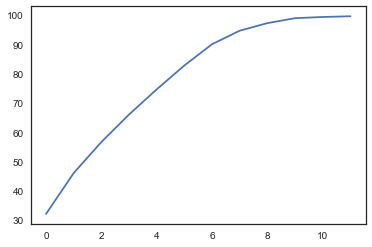

In [12]:
plt.plot(var1)

In [13]:
print(pd.DataFrame(pca.components_,columns=dff.columns,index = p_list))

           0         1         2         3         4         5         6   \
p1  -0.327179  0.002973  0.000313 -0.260698  0.008359 -0.392246  0.027524   
p2  -0.013769  0.006812 -0.001587 -0.073795  0.105793 -0.018033  0.034748   
p3   0.051968  0.002636  0.000541  0.069521 -0.060808  0.057523 -0.016022   
p4  -0.010815  0.035196  0.001199 -0.024829 -0.124163 -0.017500  0.053464   
p5   0.006414  0.002301 -0.000028  0.002693 -0.020085  0.009652  0.002597   
p6  -0.014162  0.011082  0.000098 -0.063379 -0.003358 -0.021189  0.036521   
p7   0.132145  0.021070 -0.000384  0.058078 -0.094579  0.173440  0.031850   
p8  -0.050632 -0.038276  0.001782  0.174333 -0.127405 -0.081017 -0.132941   
p9   0.024484 -0.044690 -0.001648  0.142690  0.575043 -0.034666 -0.124622   
p10 -0.000205  0.051526  0.000263 -0.302716  0.108343  0.135090  0.233718   
p11  0.389398  0.175096 -0.000497  0.223922  0.479944  0.250742  0.137635   
p12 -0.423135 -0.058672 -0.000522 -0.146497  0.579457 -0.216049 -0.055661   

This values represent how the 18 attributes considered influence the weights
of the principal components vector

In [14]:
for x in features: 
    df = df.drop(x, 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433958 entries, 0 to 433957
Data columns (total 35 columns):
index                          433958 non-null int64
StoreID                        433958 non-null int64
Date                           433958 non-null object
IsHoliday                      433958 non-null int64
HasPromotions                  433958 non-null int64
StoreType                      433958 non-null object
AssortmentType                 433958 non-null object
NearestCompetitor              433958 non-null int64
Region                         433958 non-null int64
NumberOfCustomers              433958 non-null int64
NumberOfSales                  433958 non-null int64
Region_AreaKM2                 433958 non-null int64
Region_GDP                     433958 non-null int64
Region_PopulationK             433958 non-null int64
CloudCover                     433958 non-null float64
Events                         433958 non-null object
WindDirDegrees                 4339

In [15]:
finalDf=pd.concat([df,principalDf],axis=1)
finalDf

,index,StoreID,Date,IsHoliday,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12
0,0,1000,01/03/2016,0,0,Hyper Market,General,326,7,495,...,-0.000960,-0.000858,0.002442,-0.002051,0.002739,-0.000873,-0.000008,-0.000181,-0.000370,-0.000053
1,1,1000,02/03/2016,0,0,Hyper Market,General,326,7,608,...,-0.000604,-0.000502,0.002478,-0.002263,0.002907,0.001100,-0.000220,0.000118,-0.000311,0.000174
2,2,1000,04/03/2016,0,0,Hyper Market,General,326,7,665,...,-0.000541,-0.000614,0.002193,0.000429,-0.001428,-0.000580,-0.000487,-0.000555,-0.000371,0.000443
3,3,1000,05/03/2016,0,0,Hyper Market,General,326,7,630,...,-0.000333,-0.000309,0.002189,0.000273,-0.001721,0.001533,-0.000052,-0.000604,-0.000366,0.000273
4,4,1000,07/03/2016,0,1,Hyper Market,General,326,7,763,...,-0.000300,-0.000368,0.002189,0.000252,-0.001600,0.001418,0.000146,-0.000394,0.000048,0.000330
5,5,1000,08/03/2016,0,1,Hyper Market,General,326,7,675,...,-0.000186,-0.000252,0.002214,0.000207,-0.001433,0.001628,-0.000358,-0.000715,-0.000057,0.000015
6,6,1000,09/03/2016,0,1,Hyper Market,General,326,7,690,...,-0.000125,-0.000380,0.002217,0.000156,-0.001234,0.001520,-0.000139,-0.000516,0.000076,-0.000104
7,7,1000,10/03/2016,0,1,Hyper Market,General,326,7,617,...,-0.000132,-0.000740,0.002242,0.000128,-0.000738,-0.000060,-0.000655,-0.001502,-0.000235,-0.000064
8,8,1000,11/03/2016,0,1,Hyper Market,General,326,7,636,...,-0.000142,-0.000906,0.002250,0.000266,-0.000285,-0.000376,-0.000479,-0.000658,-0.000236,-0.000168
9,9,1000,12/03/2016,0,0,Hyper Market,General,326,7,511,...,-0.000157,-0.000951,0.002239,0.000171,-0.000408,-0.000797,-0.000268,-0.000114,0.000337,0.000134


In [16]:
finalDf.head()

,index,StoreID,Date,IsHoliday,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12
0,0,1000,01/03/2016,0,0,Hyper Market,General,326,7,495,...,-0.000960,-0.000858,0.002442,-0.002051,0.002739,-0.000873,-0.000008,-0.000181,-0.000370,-0.000053
1,1,1000,02/03/2016,0,0,Hyper Market,General,326,7,608,...,-0.000604,-0.000502,0.002478,-0.002263,0.002907,0.001100,-0.000220,0.000118,-0.000311,0.000174
2,2,1000,04/03/2016,0,0,Hyper Market,General,326,7,665,...,-0.000541,-0.000614,0.002193,0.000429,-0.001428,-0.000580,-0.000487,-0.000555,-0.000371,0.000443
3,3,1000,05/03/2016,0,0,Hyper Market,General,326,7,630,...,-0.000333,-0.000309,0.002189,0.000273,-0.001721,0.001533,-0.000052,-0.000604,-0.000366,0.000273
4,4,1000,07/03/2016,0,1,Hyper Market,General,326,7,763,...,-0.000300,-0.000368,0.002189,0.000252,-0.001600,0.001418,0.000146,-0.000394,0.000048,0.000330


In [17]:
finalDf.drop(['index'],inplace=True,axis=1)

### Droppping Wind direction and event

In [18]:
finalDf.drop(['WindDirDegrees','Events'],axis=1, inplace=True)

In [19]:
print(finalDf.shape)
finalDf.head().T

(433958, 44)


,0,1,2,3,4
StoreID,1000,1000,1000,1000,1000
Date,01/03/2016,02/03/2016,04/03/2016,05/03/2016,07/03/2016
IsHoliday,0,0,0,0,0
HasPromotions,0,0,0,0,1
StoreType,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market
AssortmentType,General,General,General,General,General
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfCustomers,495,608,665,630,763
NumberOfSales,5676,8111,8300,7154,10110


In [20]:
finalDf.to_csv('./dataset/preprocessed_' + work_on + '_PCA.csv')